In [28]:

%load_ext autoreload
%autoreload 2

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from general_mm import VariationalGaussianMixture
from attrdict import AttrDict
import numpy as np
from torch.distributions import MultivariateNormal
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

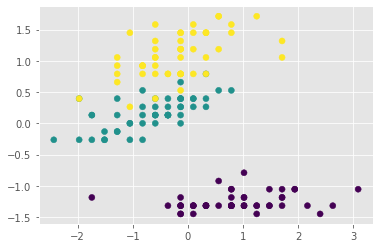

In [278]:
from sklearn.datasets import load_wine

dataset = load_iris()

learn_data = np.array(dataset.data)

learn_data = (learn_data - learn_data.mean(axis=0)) / learn_data.std(axis=0)
print(learn_data)
plt.scatter(learn_data[:, 1], learn_data[:, 3], c=dataset.target)

In [362]:
cluster_num = 3
dim = learn_data.shape[1]

parameters = AttrDict({"prior_dirichlet": 1, "prior_loc_mu": np.zeros((cluster_num, dim)),
                       "prior_beta": 1., "prior_cov_mu": 1. * np.repeat(np.identity(dim)[np.newaxis, ...], cluster_num, axis=0),
                       "prior_cov_shape": 4.})

model = VariationalGaussianMixture(cluster_num, dim, parameters)

In [363]:
model.fit(learn_data)

In [364]:
model.predict(learn_data)

array([[7.62883474e-15, 1.00000000e+00, 5.90751262e-12],
       [3.34133396e-12, 9.99999973e-01, 2.70911648e-08],
       [2.64020265e-13, 1.00000000e+00, 3.69303504e-10],
       [4.24200606e-12, 9.99999994e-01, 5.88042617e-09],
       [2.85157724e-15, 1.00000000e+00, 7.52587848e-13],
       [4.60450040e-15, 1.00000000e+00, 3.69827154e-13],
       [6.00371203e-13, 1.00000000e+00, 1.02868189e-10],
       [7.30488434e-14, 1.00000000e+00, 6.22537657e-11],
       [2.04496201e-11, 9.99999943e-01, 5.71569533e-08],
       [1.10519792e-12, 9.99999996e-01, 4.46845331e-09],
       [9.04582839e-16, 1.00000000e+00, 4.90855998e-13],
       [2.84187779e-13, 1.00000000e+00, 9.63046547e-11],
       [1.46433024e-12, 9.99999990e-01, 9.72540366e-09],
       [5.22810561e-13, 9.99999999e-01, 9.57816314e-10],
       [3.90999239e-19, 1.00000000e+00, 2.70214472e-16],
       [1.71249328e-19, 1.00000000e+00, 1.82523831e-18],
       [1.34111019e-16, 1.00000000e+00, 1.63018727e-14],
       [2.64620595e-14, 1.00000

In [365]:
print(len(learn_data))


150


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]


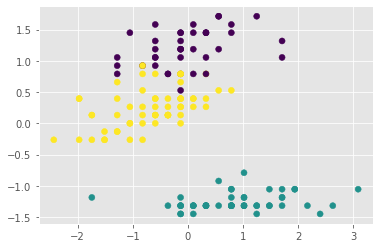

In [366]:
predicted = model.predict(learn_data)
color = predicted.argmax(axis=1)
print(color)
plt.scatter(learn_data[:, 1], learn_data[:, 3], c=color)
# for k in range(cluster_num):
#     sample = distributions[k].sample([100])[:, (1, 3)]
#     plt.scatter(sample[:, 0], sample[:, 1], s=1., alpha=0.3)
